In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

!pip install orthojax --upgrade
!pip install py-design --upgrade
!pip install orthojax --upgrade
!pip install git+https://github.com/PredictiveScienceLab/py-design
!pip install diffrax
import numpy as np
import jax.numpy as jnp
import jax.random as jr
import orthojax as ojax
import jax.numpy as jnp
from jax import jit, vmap
from collections import namedtuple
import design
import jax
import orthojax as ojax
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation #to make animation 
from functools import partial
from jax.scipy import stats as jstats
from functools import partial
from diffrax import diffeqsolve, Tsit5, SaveAt, ODETerm

  Cloning https://github.com/PredictiveScienceLab/py-design to /private/var/folders/hp/yxh9pspn4sj9pm14j55cdxlr0000gp/T/pip-req-build-cwmhxa0a
  Running command git clone --filter=blob:none --quiet https://github.com/PredictiveScienceLab/py-design /private/var/folders/hp/yxh9pspn4sj9pm14j55cdxlr0000gp/T/pip-req-build-cwmhxa0a
  Resolved https://github.com/PredictiveScienceLab/py-design to commit 7233a686cfed9c325fe168e02d71317003b4a9a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


# Homework 3

## References

+ Module 3: Uncertainty Propagation Through Scientific Models
    - Polynomial chaos

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name: Shaunak**
+ **Last Name: Mukherjee**
+ **Email: mukher86@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): Yes**
+ **Which generative AI tool did you use (if applicable)?: Github Copilots**

# Problem 1 - The Pythagorean theorem on Hilbert Spaces

Let $H$ be a Hilbert space with inner product $\langle \cdot, \cdot \rangle$ and norm $\| \cdot \|$. Let $x, y \in H$.

## Part A
Prove that if $x$ and $y$ are orthogonal, then the Pythagorean theorem holds, i.e.,

$$
\| x + y \|^2 = \| x \|^2 + \| y \|^2.
$$

*Hint:* Use the fact that $\| x + y \|^2 = \langle x + y, x + y \rangle$.

**Answer:**

We start with the hint:
\begin{equation}
\| x + y \|^2 = \langle x + y, x + y \rangle \quad \text{(1)}
\end{equation}

Expanding the right-hand side of equation (1) using properties of the inner product:
\begin{align*}
\langle x + y, x + y \rangle &= \langle x, x \rangle + \langle x, y \rangle + \langle y, x \rangle + \langle y, y \rangle
\end{align*}

Since the inner product is conjugate symmetric, we have $\langle y, x \rangle = \overline{\langle x, y \rangle}$.
Also, since $x, y \in H$ are orthogonal, $\langle x, y \rangle = 0$

This simplifies equation (1) to:
\begin{align*}
\langle x + y, x + y \rangle = \langle x, x \rangle + 0 + 0 + \langle y, y \rangle
\end{align*}

By definition, $\| x \| = \sqrt{\langle x, x \rangle}$, so equation (1) becomes:
\begin{align*}
\| x + y \|^2 = \| x \|^2 + \| y \|^2.
\end{align*}

Hence Q.E.D:
\begin{align*}
\| x + y \|^2 = \| x \|^2 + \| y \|^2.
\end{align*}

## Part B

Prove the following generalization of the Pythagorean theorem.
Let $x_1,x_2,\dots,x_n \in H$ be pairwise orthogonal, i.e., $\langle x_i, x_j \rangle = 0$ for all $i \neq j$. Then,

$$
\| x_1 + x_2 + \dots + x_n \|^2 = \| x_1 \|^2 + \| x_2 \|^2 + \dots + \| x_n \|^2.
$$

*Hint:* Use induction and the result from Part A.

**Answer:**

Let's assume that the result holds for $(n = k)$, i.e. for $k$ pairwise orthogonal vectors $(x_1, x_2, \dots, x_k)$, we are assumung results from Part A holds: $
\| x_1 + x_2 + \dots + x_k \|^2 = \| x_1 \|^2 + \| x_2 \|^2 + \dots + \| x_k \|^2.$

We need to prove that the result holds for $(n = k+1)$ vector, i.e., for any set of $(k+1)$ pairwise orthogonal vectors $(x_1, x_2, \dots, x_{k+1})$:

$\| x_1 + x_2 + \dots + x_{k+1} \|^2 = \| x_1 \|^2 + \| x_2 \|^2 + \dots + \| x_{k+1} \|^2.$

The sum can be written as: $x_1 + x_2 + \dots + x_{k+1} = (x_1 + x_2 + \dots + x_k) + x_{k+1}$

Vectors $x_1, x_2, \dots, x_k$ are pairwise orthogonal, so they are orthogonal to $x_{k+1}$.

This implies that:
$
\langle x_k, x_{k+1} \rangle = 0 \quad \forall k = 1, 2, \dots, k$

Thus, $(x_1 + x_2 + \dots + x_k)$ and $x_{k+1}$ are orthogonal. Now, applying the result from Part A, we have:

$
\| (x_1 + x_2 + \dots + x_k) + x_{k+1} \|^2 = \| x_1 + x_2 + \dots + x_k \|^2 + \| x_{k+1} \|^2$

By the induction, we know that:

$
\| x_1 + x_2 + \dots + x_k \|^2 = \| x_1 \|^2 + \| x_2 \|^2 + \dots + \| x_k \|^2
$

Thus, we get:
$
\| x_1 + x_2 + \dots + x_{k+1} \|^2 = \left( \| x_1 \|^2 + \| x_2 \|^2 + \dots + \| x_k \|^2 \right) + \| x_{i+1} \|^2.
$
Therefore, the result holds for $(n = k+1)$. Hence, Q.E.D

# Problem 2 - All infinite dimensional separable Hilbert spaces are isomorphic to $\ell^2$

An infinite dimensional Hilbert space $H$ are isomorphic to $\ell^2$, the space of square summable sequences of real numbers. In this problem we will prove this result.
Intuitively, this means that we can think of vectors in $H$ as infinite dimensional vectors in $\ell^2$.
It is as if the space $H$ is a relabeling of the space $\ell^2$.
First, recall that

$$
\ell^2 = \left\{ a = (a_1, a_2, \dots) \mid \sum_{i=1}^\infty |a_i|^2 < \infty \right\}.
$$

The innner product in $\ell^2$ is given by

$$
\langle a, b \rangle_{\ell^2} = \sum_{i=1}^\infty a_i b_i,
$$

for all $a, b \in \ell^2$.

To show that two spaces are isomorphic, we need to show that there exists a bijective linear map between them which keeps the inner product intact.
Bijection means that the map is one-to-one and onto.
So, we need to find an invertible, linear map:

$$
T: H \to \ell^2.
$$

To keep the inner product intact, we need to show that for all $x, y \in H$,

$$
\langle x, y \rangle = \langle T(x), T(y) \rangle_{\ell^2}.
$$

Here, on the left we have the inner product in $H$ and on the right we have the inner product in $\ell^2$.
If the inner products are intact, orthogonality is preserved by $T$.
And also norms are preserved, since $\| x \| = \sqrt{\langle x, x \rangle}$.

Okay, this is what you will have to do.
I will give you the right $T$ and you will have to show that it is linear, invertible, and keeps the inner product intact.

Recall that since $H$ is separable, it has a countable orthonormal basis $\{ e_1, e_2, \dots \}$.
This means that every vector $x \in H$ can be written as

$$
    x = \sum_{i=1}^\infty \langle x, e_i \rangle e_i.
$$

The idea is to use the Fourier coefficients $\langle x, e_i \rangle$ as the entries of the vector $T(x)$, i.e., we define:

$$
T(x) = ( \langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots ).
$$

## Part A

Show that $T(x)$ is indeed in $\ell^2$ for all $x \in H$. That is, show that $\sum_{i=1}^\infty |\langle x, e_i \rangle|^2 < \infty$.

*Hint:* Use Parseval's identity.

**Answer:**

Reference https://sites.math.washington.edu/~burke/crs/555/555_notes/hilbert.pdf

By Parseval's identity, for any $x \in H$ and any orthonormal basis $\{e_i\}_{i=1}^\infty$ of $H$, we have:

$$
\|x\|^2 = \sum_{i=1}^\infty |\langle x, e_i \rangle|^2.
$$

Since $x \in H$, its norm $\|x\|$ is well-defined and finite.  Therefore, the sum on the right-hand side must also be finite:

$$
\sum_{i=1}^\infty |\langle x, e_i \rangle|^2 = \|x\|^2 < \infty.
$$

This shows that the sequence $(\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots)$ is square-summable, and thus belongs to $\ell^2$.  Therefore, $T(x) \in \ell^2$ for all $x \in H$. Hence, Q.E.D

## Part B

Show that $T$ is a linear map, i.e., show that for all $x, y \in H$ and $\alpha, \beta \in \mathbb{R}$,

$$
T(\alpha x + \beta y) = \alpha T(x) + \beta T(y).
$$

**Answer:**

\begin{align*}
T(\alpha x + \beta y) &= (\langle \alpha x + \beta y, e_1 \rangle, \langle \alpha x + \beta y, e_2 \rangle, \dots) \\
&= (\alpha \langle x, e_1 \rangle + \beta \langle y, e_1 \rangle, \alpha \langle x, e_2 \rangle + \beta \langle y, e_2 \rangle, \dots) \\
&= (\alpha \langle x, e_1 \rangle, \alpha \langle x, e_2 \rangle, \dots) + (\beta \langle y, e_1 \rangle, \beta \langle y, e_2 \rangle, \dots) \\
&= \alpha (\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots) + \beta (\langle y, e_1 \rangle, \langle y, e_2 \rangle, \dots) \\
&= \alpha T(x) + \beta T(y).
\end{align*}

Thus, $T(\alpha x + \beta y) = \alpha T(x) + \beta T(y)$, which proves that $T$ is a linear map. Hence, Q.E.D

## Part C

Show that $T$ is onto.

*Hint:* Take a vector $a \in \ell^2$ and show that there exists a vector $x \in H$ such that $T(x) = a$. Just try to write down the vector $x$ in terms of $a$ and the orthonormal basis $\{ e_1, e_2, \dots \}$.

**Answer:**

Let $a = (a_1, a_2, \dots) \in \ell^2$ and we know that $\sum_{i=1}^\infty |a_i|^2 < \infty$.  We want to find an $x \in H$ such that $T(x) = a$, which means we need to find an $x$ such that $\langle x, e_i \rangle = a_i$ for all $i$.

Let $x$ be using the orthonormal basis $\{e_1, e_2, \dots\}$:

$$
x = \sum_{i=1}^\infty a_i e_i.
$$

Since $\sum_{i=1}^\infty |a_i|^2 < \infty$ and $\{e_i\}$ is an orthonormal basis, this series converges in $H$.  Now, let's check if $T(x) = a$:

\begin{align*}
T(x) &= (\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots) \\
&= \left( \left\langle \sum_{j=1}^\infty a_j e_j, e_1 \right\rangle, \left\langle \sum_{j=1}^\infty a_j e_j, e_2 \right\rangle, \dots \right) \\
&= (a_1, a_2, \dots) \\
&= a.
\end{align*}

Thus, for any $a \in \ell^2$, we have found an $x \in H$ such that $T(x) = a$. This shows that $T$ is onto.

## Part D

Show that $T$ is one-to-one.

*Hint:* Take two vectors $x, y \in H$ and show that if $T(x) = T(y)$, then $x = y$.

**Answer:**

Suppose $T(x) = T(y)$ for some $x, y \in H$.  This means that:

$$
(\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots) = (\langle y, e_1 \rangle, \langle y, e_2 \rangle, \dots).
$$

Therefore, $\langle x, e_i \rangle = \langle y, e_i \rangle$ for all $i = 1, 2, \dots$.  This implies that $\langle x - y, e_i \rangle = 0$ for all $i$.

Now, consider the vector $x - y$.  We can write it as:

$$
x - y = \sum_{i=1}^\infty \langle x - y, e_i \rangle e_i.
$$

Since $\langle x - y, e_i \rangle = 0$ for all $i$, we have:

$$
x - y = \sum_{i=1}^\infty 0 \cdot e_i = 0.
$$

Thus, $x - y = 0$, which means $x = y$.  Therefore, $T$ is one-to-one. Q.E.D

## Part E

Show that $T$ keeps the inner product intact. That is, show that for all $x, y \in H$,

$$
\langle x, y \rangle = \langle T(x), T(y) \rangle_{\ell^2}.
$$

*Hint:* Use the fact that $T$ is linear and the definition of $T$. The inner product of two vectors in $\ell^2$ is defined as $\langle a, b \rangle_{\ell^2} = \sum_{i=1}^\infty a_i b_i$.

**Answer:**

We need to show that $T$ preserves the inner product. That is, for all $x, y \in H$, we need to show that $\langle x, y \rangle = \langle T(x), T(y) \rangle_{\ell^2}$.

Let $x, y \in H$.  Then,

\begin{align*}
\langle T(x), T(y) \rangle_{\ell^2} &= \left\langle (\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots), (\langle y, e_1 \rangle, \langle y, e_2 \rangle, \dots) \right\rangle_{\ell^2} \\
&= \sum_{i=1}^\infty \langle x, e_i \rangle \langle y, e_i \rangle.
\end{align*}

We know that we can express $x$ as $x = \sum_{i=1}^\infty \langle x, e_i \rangle e_i$ and $y$ as $y = \sum_{j=1}^\infty \langle y, e_j \rangle e_j$.  Therefore,

\begin{align*}
\langle x, y \rangle &= \left\langle \sum_{i=1}^\infty \langle x, e_i \rangle e_i, \sum_{j=1}^\infty \langle y, e_j \rangle e_j \right\rangle \\
&= \sum_{i=1}^\infty \sum_{j=1}^\infty \langle x, e_i \rangle \langle y, e_j \rangle \langle e_i, e_j \rangle.
\end{align*}

Since $\{e_i\}$ is an orthonormal basis, $\langle e_i, e_j \rangle = \delta_{ij}$, where $\delta_{ij}$ is the Kronecker delta (1 if $i=j$, 0 otherwise).  Thus,

\begin{align*}
\langle x, y \rangle &= \sum_{i=1}^\infty \sum_{j=1}^\infty \langle x, e_i \rangle \langle y, e_j \rangle \delta_{ij} \\
&= \sum_{i=1}^\infty \langle x, e_i \rangle \langle y, e_i \rangle \\
&= \langle T(x), T(y) \rangle_{\ell^2}.
\end{align*}

Therefore, $T$ preserves the inner product. Hence, Q.E.D.

# Problem 3 - Numerical Construction of Polynomial Chaos

Through this problem, you are going to construct orthogonal polynomials for the exponential distribution and test a few things with them.
You need to familiarize yourself with [this hands-on-activity](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/up/polynomial_chaos/04_orthpol_demo.html) before you proceed.

## Part A

Consider the random variable:

$$
\Xi \sim \exp(1).
$$

The exponential distribution has the following probability density function:

$$
f_\Xi(\xi) = \begin{cases}
e^{-\xi} & \xi \geq 0 \\
0 & \xi < 0
\end{cases}.
$$

Use the `orthojax` package to construct the first 5 orthogonal polynomials for $\Xi$.
Plot them on the same figure for $\xi \in [0, 5]$.

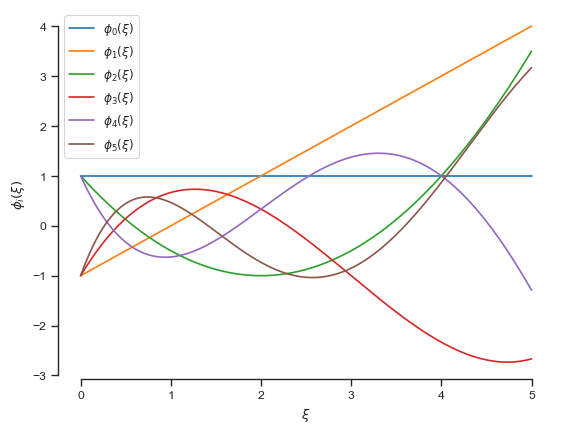

In [ ]:
# your code here
# Hint: You can use the function orthojax.make_orthogonal_polynomial
# but you need to pass the argument right=jnp.inf to indicate that
# the right endpoint is infinity.

# Define polynomial degree and weight function
degree = 5
pdf = lambda xi: jnp.where(xi >= 0, jnp.exp(-xi), 0)

# Generate xi values
xis = jnp.linspace(0.0, 5.0, 200)

# Create polynomial
poly = ojax.make_orthogonal_polynomial(degree, left=0.0, right=jnp.inf, wf=pdf)
phi = poly(xis)

# Create plot
fig, ax = plt.subplots()
for i in range(degree + 1):
  phi_i = phi[:,i]
  # print(phi_i.shape)
  ax.plot(xis, phi_i, label=f"$\phi_{{{i}}}(\\xi)$")

ax.legend()
ax.set(xlabel=r"$\xi$", ylabel=r"$\phi_i(\xi)$")

sns.despine(trim=True)
plt.show()


## Part B

Project the function:

$$
f(\xi) = \sin(x)
$$

onto the first 5 orthogonal polynomials for $\Xi$. Plot the function $f$ and its projection on the same figure for $\xi \in [0, 5]$.

*Hint:* Do exactly what I do in the activity. You need to extract from `poly` the quadrature rule so that you can do the inner product.

(100,) (100,)


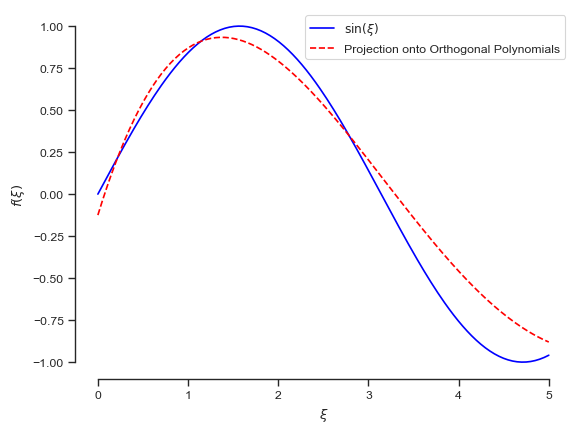

In [3]:
# Define function to be projected
f = lambda xi: jnp.sin(xi)

# Extract quadrature
x, w = poly.quad
print(x.shape, w.shape)

# Evaluate function and polynomials 
f_nodes = f(x)
phi_nodes = poly(x)

# Compute projection coefficients
coeffs = jnp.einsum("i, ij->j", w * f_nodes, phi_nodes)

# Construct the projection
f_proj = jnp.dot(phi, coeffs)

# Plot
plt.plot(xis, f(xis), label=r"$\sin(\xi)$", color='blue')
plt.plot(xis, f_proj, label="Projection onto Orthogonal Polynomials", linestyle='--', color='red')
plt.xlabel(r"$\xi$")
plt.ylabel(r"$f(\xi)$")
plt.legend()
plt.grid(False)
sns.despine(trim=True)

## Part C

Use the polynomial projection to calculate the mean and variance of the random variable

$$
Y = f(\Xi) = \sin(\Xi).
$$

Compare to Monte Carlo estimates or the exact values.

In [4]:
# Your code here

# Compute mean and variance using polynomial projection
mean_pc = coeffs[0] 
poly_norms = jnp.einsum("i,ij,ik->j", w, phi_nodes, phi_nodes)   
variance_pce = jnp.einsum("j,j->", coeffs[1:]**2, poly_norms[1:])   

# Monte Carlo estimates
key = jr.PRNGKey(42)
M = 100000  # Number of MC samples

xi_samples = jr.exponential(key, shape=(M,))  
y_samples = jnp.sin(xi_samples)
mean_mc = jnp.mean(y_samples)
variance_mc = jnp.var(y_samples)

# Exact mean and variance 
exact_mean = 1 / (1 + 1**2)  
exact_var = 0.5 - exact_mean**2
  
# Print results
print(f"Mean (PC): {mean_pc:.3f}, Mean (MC): {mean_mc:.3f}, Mean (Exact): {exact_mean:.3f}")
print(f"Variance (PC): {variance_pce:.3f}, Variance (MC): {variance_mc:.3f}, Variance (Exact): {exact_var:.3f}")


Mean (PC): 0.500, Mean (MC): 0.501, Mean (Exact): 0.500
Variance (PC): 0.141, Variance (MC): 0.150, Variance (Exact): 0.250


# Problem 4 - Uncertainty Propagation with Polynomial Chaos

Consider the Lorenz system:

$$
\begin{align*}
\dot{x} &= \sigma(y-x),\\
\dot{y} &= x(\rho-z)-y,\\
\dot{z} &= xy-\beta z,
\end{align*}
$$

with parameters $\sigma=10$, $\beta=8/3$, and $\rho=28$.
Take the initial conditions to be random:

$$
\begin{align*}
x(0) &\sim \mathcal{N}(0, 0.01),\\
y(0) &\sim \mathcal{N}(0, 0.01),\\
z(0) &\sim \mathcal{N}(0, 0.01).
\end{align*}
$$

Use may reuse code from [this hands-on activity](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/up/polynomial_chaos/07_pce_dynamical_system.html).

## Part A - Build a Polynomial Chaos Surrogate

Build a polynomial chaos surrogate. Calculate the mean and the variance as a function of time. Compare the result to Monte Carlo estimates.

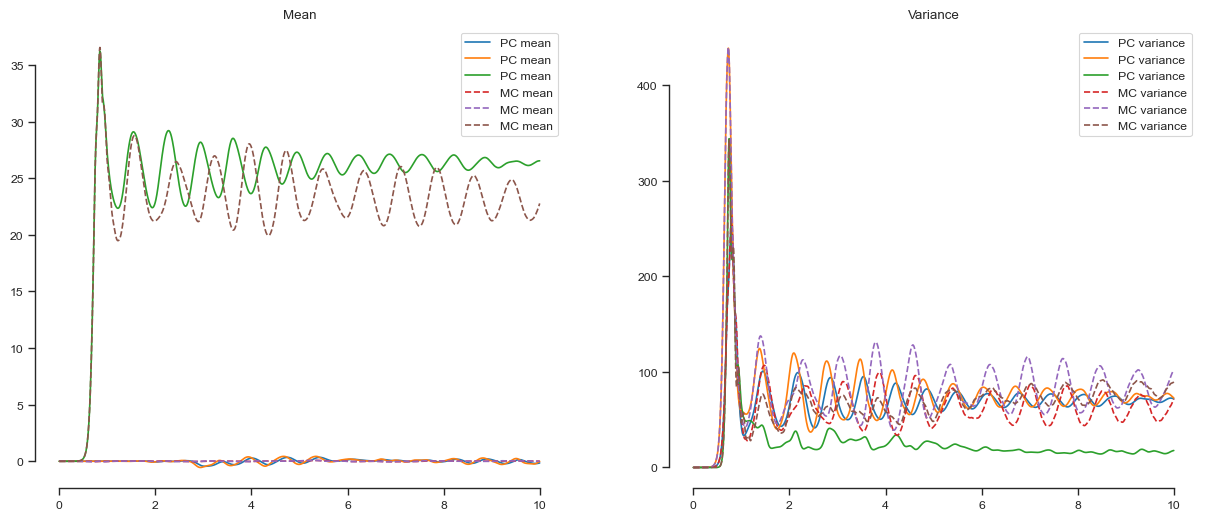

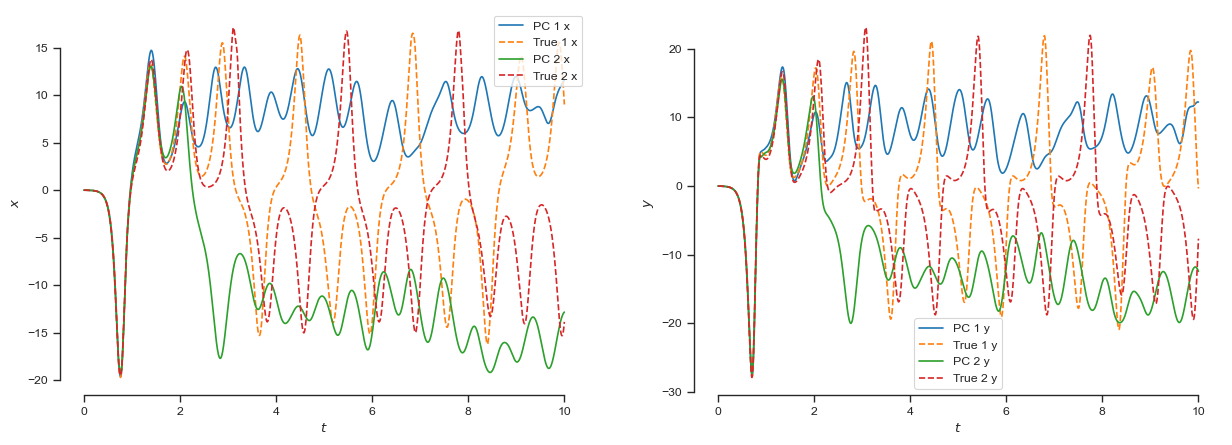

In [5]:
# Your code here
# Following code implemented in https://predictivesciencelab.github.io/advanced-scientific-machine-learning/up/polynomial_chaos/07_pce_dynamical_system.html
# Sparse grid and polynomial basis generation functions

def make_sparse_grid(dim, level): 

    """Make a sparse grid of dimension dim and a given level.
    We do it for the uniform cube [-1, 1]^d.

    Params:
        dim: The dimension of the sparse grid
        level: The level of the sparse grid
    Returns:
        A quadrature rule
    """
    x, w = design.sparse_grid(dim, level, 'F2') # F2 is the Clenshaw-Curtis rule
    w = w / (2 ** dim) # Adjust weights for the cube [-1, 1]^d
    x = jnp.array(x, dtype=jnp.float32) # Convert to JAX array
    w = jnp.array(w, dtype=jnp.float32) # Convert to JAX array
    return ojax.QuadratureRule(x, w) # Return the quadrature rule

# Polynomial Chaos Problem Setup 
PCProblem = namedtuple("PCProblem", ["poly", "quad", "f", "x0", "phis", "y0", "rhs"]) 

def make_pc_problem(poly, quad, f, x0):    
    """Make the PC dynamical system problem.

    Params:
        poly: The polynomial basis
        quad: The quadrature rule used to compute inner products
        f: The function defining the right hand side of the ODE (function of x, t and xi) to R^n
        x0: The initial condition (function of xi, from R^d -> R^n)
        theta: The parameters of the ODE
    """
    xis, ws = quad 
    phis = poly(xis)
    x0s = jit(vmap(x0))(xis)
    y0 = jnp.einsum("m,mp,mn->np", ws, phis, x0s)
    
    # Adjusted fv mapping (now passes x, y, z)
    fv = vmap(f, in_axes=(None, 0, None))  # Map over the quadrature points
    
    @jit
    def rhs(t, y, phis):
        """Right-hand side of the polynomial chaos system.
        Params:
            t: Time
            y: The current state of the system
            phis: The polynomial basis evaluated at the quadrature points
        returns:
            The right-hand side of the polynomial chaos system    
        """
        xs = jnp.einsum("np,mp->mn", y, phis)
        x, y, z = xs[:, 0], xs[:, 1], xs[:, 2] # Unpack xs into x, y, z
        fs = fv(t, xs, params)  # Pass x, y, z to lorenz
        return jnp.einsum("m,mn,mp->np", ws, fs, phis)
    
    return PCProblem(poly, quad, f, x0, phis, y0, rhs)

NormalDistribution = namedtuple("NormalDistribution", ["mu", "sigma"])
Parameters = namedtuple("Parameters", ["sigma", "beta", "rho"])
Lorentz = namedtuple("Lorentz", ["params", "X", "Y", "Z"])

X = NormalDistribution(0.00, 0.01) # Normal distribution for X
Y = NormalDistribution(0.00, 0.01) # Normal distribution for Y
Z = NormalDistribution(0.00, 0.01) # Normal distribution for Z

params = Parameters(10.0, 8.0/3.0, 28.0)

lorentz = Lorentz(params, X, Y, Z)
# print(lorentz)
# Trabsform a normal distribution to a [-1, 1]
# @jit
def to_normal(xi : float, dist : NormalDistribution) -> float:
    """Transforms a [-1, 1] to a normal distribution.
    params:
        xi: The value to transform
        dist: The normal distribution
    returns:
        The transformed value
    """
    return dist.mu + dist.sigma * jstats.norm.ppf(0.5 * (xi + 1))

# Initial condition for the Lorenz system
# @jit
def x0(xi, lorentz : Lorentz):
    """Initial condition for the position.
    params:
        xi: The xi values
        lorentz: The Lorenz system
    returns:
        The initial condition 
    """
    return jnp.array(
        [to_normal(xi[0], lorentz.X), to_normal(xi[1], lorentz.Y), to_normal(xi[2], lorentz.Z)]   
    )

# @jit
def vector_field(t, y, params):
    """Vector field for the Lorenz system.
    params:
        t: The time
        y: The current state
        params: The parameters of the system
    returns:
        The vector field
    """
    x, y, z = jnp.split(y, 3)
    x, y, z = x.squeeze(), y.squeeze(), z.squeeze()  # Ensure scalars

    sigma = params.sigma
    beta = params.beta
    rho = params.rho
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return jnp.array([dxdt, dydt, dzdt])

@jit
@partial(vmap, in_axes=(0, None))
def solve_lorentz(xi, lorentz : Lorentz):
    
    """Solve the Lorenz system for a given xi.
    params:
        xi: The xi values
        lorentz: The Lorenz system
    returns:
        The solution of the Lorenz system
    """
    solver = Tsit5()
    saveat = SaveAt(ts=jnp.linspace(0, 10, 2000))
    term = ODETerm(vector_field)
    sol = diffeqsolve(
        term, 
        solver, 
        t0=0,
        t1=10,
        dt0=0.1,
        y0=x0(xi, lorentz),
        args=lorentz.params,
        saveat=saveat
    )
    return sol.ys

# solve_lorentz = jit(vmap(solve_lorentz, in_axes=(0, None)))


# Define Monte Carlo ground truth
num_samples = 100_000
xis = 2 * np.random.uniform(size =(num_samples, 3)) - 1
samples = solve_lorentz(xis, lorentz)
mc_mean = jnp.mean(samples, axis=0)
mc_var = jnp.var(samples, axis=0)

# Define the polynomial chaos problem
total_degree = 30
degrees = (10, 10, 10)
poly = ojax.TensorProduct(
    total_degree,
    [ojax.make_legendre_polynomial(d) for d in degrees])
level = 10
quad = make_sparse_grid(3, level)
new_vector_field = lambda t, x, xi: vector_field(t, x, lorentz.params)
new_x0 = lambda xi: x0(xi, lorentz)
pc_problem = make_pc_problem(poly, quad, new_vector_field, new_x0)

@jit
def solve_lorentz_pc(lorentz, poly = poly, quad = quad):
    """Solve the Lorenz system using polynomial chaos.
    params:
        lorentz: The Lorenz system
        poly: The polynomial basis
        quad: The quadrature rule
    returns:
        The solution of the Lorenz system
    """
    new_vector_field = lambda t, x, xi: vector_field(t, x, lorentz. params)
    new_x0 = lambda xi: x0(xi, lorentz)
    pc_problem = make_pc_problem(poly, quad, new_vector_field, new_x0)
    sol = diffeqsolve(
        ODETerm(pc_problem.rhs),
        Tsit5(),
        t0=0,
        t1=10,
        dt0=0.1,
        y0=pc_problem.y0,
        args=pc_problem.phis,
        saveat = SaveAt(ts=jnp.linspace(0, 10, 2000))
        )          
    return sol
pc_sol = solve_lorentz_pc(lorentz)
pc_mean = pc_sol.ys[:,:,0]
pc_variance = np.sum(pc_sol.ys[:,:,1:]**2, axis=2)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 1 row, 2 columns

# Plot mean in the first subplot
axes[0].plot(pc_sol.ts, pc_mean, label="PC mean")
axes[0].plot(pc_sol.ts, mc_mean, '--', label="MC mean")
axes[0].legend(loc="best")
axes[0].set_title("Mean")
sns.despine(trim=True, ax=axes[0])

# Plot variance in the second subplot
axes[1].plot(pc_sol.ts, pc_variance, label="PC variance")
axes[1].plot(pc_sol.ts, mc_var, '--', label="MC variance")
axes[1].legend(loc="best")
axes[1].set_title("Variance")
sns.despine(trim=True, ax=axes[1])

@jit
def surrogate(xis, pc_coeff = pc_sol.ys, poly = poly):
    """Surrogate model for the Lorenz system.
    
    params:
        xis: The xi values
        pc_coeff: The polynomial chaos coefficients
        poly: The polynomial basis
    returns:
        The surrogate values
    """
    phis = poly(xis)
    ys = jnp.einsum("tip,mp->mti", pc_coeff, phis)
    # ys = jnp.einsum("tm, bm -> tb", pc_coeff, phis)
    return ys

# test the surrogate model
num_test = 2
xi_test = 2 * np.random.uniform(size=(num_test, 3)) - 1
preds = surrogate(xi_test)
names = ["x", "y", "z"]
true = solve_lorentz(xi_test, lorentz)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(num_test):
    for k in range(2):
        ax[k].plot(pc_sol.ts, preds[i, :, k], label=f"PC {i+1} {names[k]}")
        ax[k].plot(pc_sol.ts, true[i, :, k], '--', label=f"True {i+1} {names[k]}")
        ax[k].legend(loc="best")
        ax[k].set_xlabel("$t$")
        ax[k].set_ylabel("$" + names[k] + "$")
    plt.legend(loc="best")
sns.despine(trim=True);

## Part B - Predictions

Generate three random initial conditions and propagate them forward in time using the surrogate. Plot only $x$ as a function of time for each initial condition. Compare to the ground truth.

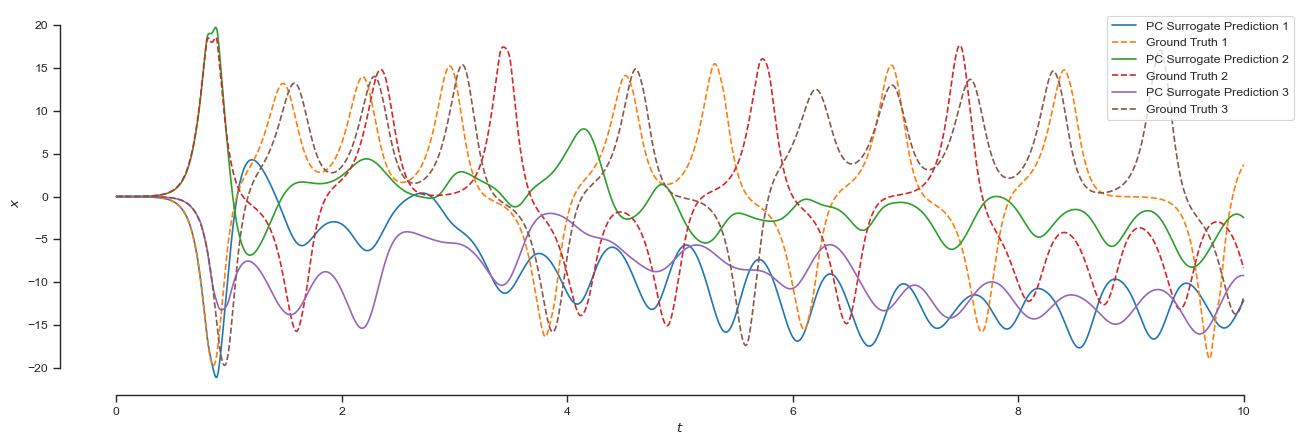

In [6]:
# Your code here
# Generate three random initial conditions
num_test = 3
xi_test = 2 * np.random.uniform(size=(num_test, 3)) - 1
# Compute predictions using the surrogate model
preds = surrogate(xi_test)
# Compute ground truth using the solver
true = solve_lorentz(xi_test, lorentz)

# Plot 
fig, ax = plt.subplots(figsize=(16, 5))
for i in range(num_test):
    ax.plot(pc_sol.ts, preds[i, :, 0], label=f"PC Surrogate Prediction {i+1}")
    ax.plot(pc_sol.ts, true[i, :, 0], '--', label=f"Ground Truth {i+1}")

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.legend(loc="best")
sns.despine(trim=True)
plt.show()


## Part C - Probability Density Function

Use your surrogate to estimate the probability density function of $x$ at $t=1, 2, 5,$ and $10$.
Use different plots for each case.
You can do this, by generating $100,000$ initial conditions, propagating them forward through the surrogate and then plotting a histogram of the results.
Compare to Monte Carlo PDFs. Use transparency in your plots.

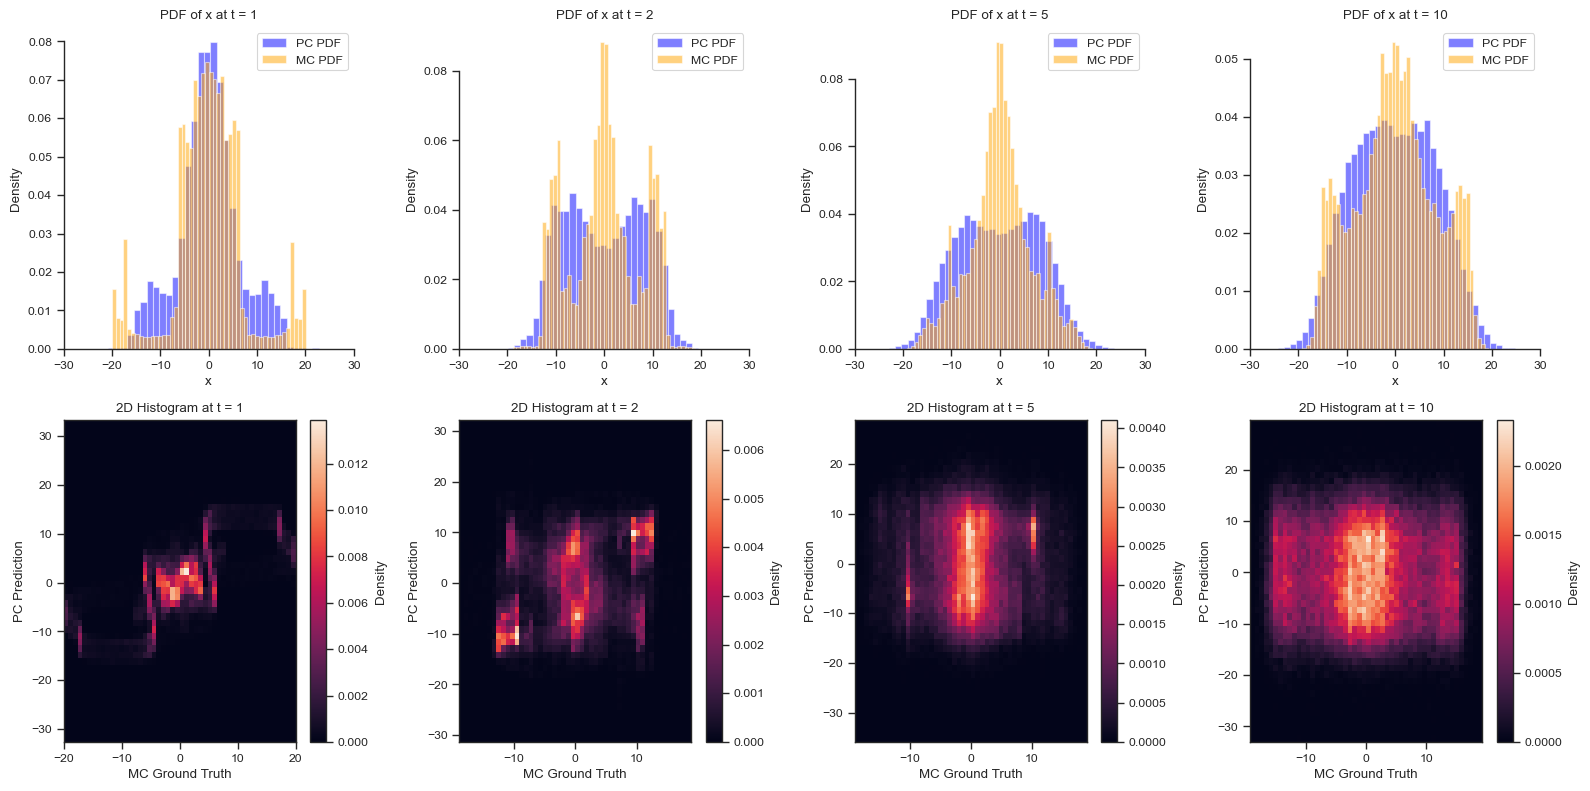

In [7]:
# Your code here

# Generate 100,000 initial conditions
num_samples = 100_000
xi_samples = 2 * np.random.uniform(size=(num_samples, 3)) - 1 

# Time points 
time_points = [1, 2, 5, 10]

# Monte Carlo ground truth
mc_samples = solve_lorentz(xi_samples, lorentz)

# Create a grid of 2 rows for plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  

# Iterate through time points and plot histograms
for i, t in enumerate(time_points):
    time_index = jnp.argmin(jnp.abs(pc_sol.ts - t))

    # PC predictions & MC ground truth
    pc_predictions = surrogate(xi_samples)[:, time_index, 0]
    mc_ground_truth = mc_samples[:, time_index, 0]

    # Convert JAX arrays to NumPy for plotting
    pc_predictions_np = np.array(pc_predictions)
    mc_ground_truth_np = np.array(mc_ground_truth)

    col = i  
    # Plot 1D histograms 
    ax1 = axes[0, col]
    ax1.hist(pc_predictions_np, bins=50, alpha=0.5, density=True, label="PC PDF", color='blue')
    ax1.hist(mc_ground_truth_np, bins=50, alpha=0.5, density=True, label="MC PDF", color='orange')
    ax1.set_title(f"PDF of x at t = {t}")
    ax1.set_xlim(-30, 30)
    ax1.set_xlabel("x")
    ax1.set_ylabel("Density")
    ax1.legend(loc="best")
    sns.despine(trim=True, ax=ax1)  

    # Plot 2D histogram
    ax2 = axes[1, col]
    h = ax2.hist2d(mc_ground_truth_np, pc_predictions_np, bins=50, density=True)
    ax2.set_title(f"2D Histogram at t = {t}")
    ax2.set_ylabel("PC Prediction")
    ax2.set_xlabel("MC Ground Truth")
    plt.colorbar(h[3], ax=ax2, label="Density") 
plt.tight_layout()
plt.show()